In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('acept_chunk0.csv',low_memory=False)
pd.set_option('display.max_columns',151)
pd.set_option('display.max_rows',151)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

## Data Preprocessing

In [4]:
df.shape

(50000, 151)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 57.6+ MB


### Sumation null value

In [6]:
df.isnull().sum()

id                                                0
member_id                                     50000
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      2995
emp_length                                     2989
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
desc        

In [7]:
#df.columns.tolist()

## unnecessary columns

In [8]:
unns_columns = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
             'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
             'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt','disbursement_method', 'funded_amnt', 
             'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d',
             'mths_since_last_delinq',
              'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct','last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 
             'mo_sin_rcnt_tl','mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd',
             'sec_app_collections_12_mths_ex_med','num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
             'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts','num_rev_tl_bal_gt_0', 'num_sats',
             'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
             'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq',     'percent_bc_gt_75', 'pymnt_plan', 
             'recoveries','tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high','last_fico_range_low',
             'url','id','title','tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 
             'sec_app_chargeoff_within_12_mths','total_il_high_credit_limit', 'total_pymnt', 
             'total_pymnt_inv','total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
             'total_rev_hi_lim']

In [9]:
'''keep_cols=[ loan_amnt term  int_rate  installment  grade   sub_grade   emp_title     emp_length  home_ownership        
    annual_inc  verification_status issue_d    loan_status    purpose  zip_code   dti   earliest_cr_line   open_acc             
    pub_rec  revol_bal      revol_util    total_acc      initial_list_status  application_type   mort_acc              
    pub_rec_bankruptcies  ]'''

'keep_cols=[ loan_amnt term  int_rate  installment  grade   sub_grade   emp_title     emp_length  home_ownership        \n    annual_inc  verification_status issue_d    loan_status    purpose  zip_code   dti   earliest_cr_line   open_acc             \n    pub_rec  revol_bal      revol_util    total_acc      initial_list_status  application_type   mort_acc              \n    pub_rec_bankruptcies  ]'

In [10]:
#keep col=25

In [11]:
l=len(unns_columns)
l

66

In [12]:
print("This {} columns are unnecessary because few features were recorded after the loan approved so this columns are not usefull for prediction and few columns we drop because of data leakage.".format(l))

This 66 columns are unnecessary because few features were recorded after the loan approved so this columns are not usefull for prediction and few columns we drop because of data leakage.


In [13]:
#Dropping unnecessary columns

modi_df=df.drop(columns=unns_columns,axis=1)

In [14]:
modi_df.shape

(50000, 85)

In [15]:
modi_df.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,pub_rec_bankruptcies,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,NaN,debt_consolidation,190xx,PA,5.91,Aug-2003,675.0,679.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,NaN,30.0,1.0,Individual,NaN,NaN,NaN,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,3.0,1.0,4.0,1.0,69.0,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,NaN,small_business,577xx,SD,16.06,Dec-1999,715.0,719.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,NaN,NaN,1.0,Individual,NaN,NaN,NaN,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,0.0,0.0,6.0,4.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,NaN,home_improvement,605xx,IL,10.78,Aug-2000,695.0,699.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,NaN,NaN,1.0,Joint App,71000.0,13.85,Not Verified,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,NaN,debt_consolidation,076xx,NJ,17.06,Sep-2008,785.0,789.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,Apr-2019,NaN,1.0,Individual,NaN,NaN,NaN,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,NaN,major_purchase,174xx,PA,25.37,Jun-1998,695.0,699.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,NaN,NaN,1.0,Individual,NaN,NaN,NaN,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,2.0,1.0,3.0,6.0,12.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now we will drop those features having at least 50% missing values

In [16]:
#Name of the columns which has at least 50% missing value

modi_df.columns[modi_df.isnull().mean()>=0.5]

Index(['member_id', 'desc', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',

In [17]:
#Dropped columns having 50% missing value

l=len(modi_df.columns[modi_df.isnull().mean()>=0.5])
drop_cols=modi_df.columns[modi_df.isnull().mean()>=0.5]
new_df=modi_df.drop(columns=drop_cols,axis=1)
print("Here we droping {} columns which has at least 50% missing value".format(l))

Here we droping 55 columns which has at least 50% missing value


In [18]:
new_df.shape

(50000, 30)

In [19]:
#Dropping "Policy_Code" columns bcz it has only one feature

new_df['policy_code'].describe()

count    50000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [20]:
new_df=new_df.drop(['policy_code'],axis=1)

In [21]:
new_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             50000 non-null  float64
 1   term                  50000 non-null  object 
 2   int_rate              50000 non-null  float64
 3   installment           50000 non-null  float64
 4   grade                 50000 non-null  object 
 5   sub_grade             50000 non-null  object 
 6   emp_title             47005 non-null  object 
 7   emp_length            47011 non-null  object 
 8   home_ownership        50000 non-null  object 
 9   annual_inc            50000 non-null  float64
 10  verification_status   50000 non-null  object 
 11  issue_d               50000 non-null  object 
 12  loan_status           50000 non-null  object 
 13  purpose               50000 non-null  object 
 14  zip_code              50000 non-null  object 
 15  addr_state         

### Checking null value again after droping cloumns

In [23]:
new_df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2995
emp_length              2989
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        1
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                24
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies       0
dtype: int64

##### Now we can see "employee_title", and "employee_length" has almost 6% null value and "revol_util" has almost 0.04% null values and "dti" has only 1 missing values

## Missing value imputation


#### So here we will compute "employee_title" and "employee_length" with most frequent categories

In [24]:
new_df["emp_title"].fillna('Teacher',inplace =True)

In [25]:
new_df["emp_length"].fillna('10+ years',inplace =True)

##### For "revol_util" replace missing values with mean

In [26]:
new_df["revol_util"].fillna(df['revol_util'].mean(), inplace =True)

In [27]:
##### For dti only one value is missing thats why i drop it

In [28]:
new_df.dropna(inplace=True)

In [29]:
new_df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

## Feature Engineering

In [30]:
#making new feature avaraging "fico_range_high" & "fico_range_low"

new_df['fico_avg_score'] = (new_df['fico_range_high']+new_df['fico_range_low'] )/2

In [31]:
#we droping "fico_range_high" & "fico_range_low" features

new_df=new_df.drop(['fico_range_high','fico_range_low'],axis=1)

In [32]:
#Changing the columns pub_rec, mort_acc, pub_rec_bankruptcies

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [33]:
new_df['pub_rec'] = new_df.pub_rec.apply(pub_rec)
new_df['mort_acc'] = new_df.mort_acc.apply(mort_acc)
new_df['pub_rec_bankruptcies'] = new_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [34]:
new_df['pub_rec_bankruptcies'].value_counts()

0    43695
1     6304
Name: pub_rec_bankruptcies, dtype: int64

### emp_tiltle

In [35]:
new_df.emp_title.nunique()

21288

#### in this emp_title there are too many unique tittle so i will drop it

In [36]:
new_df.drop('emp_title', axis=1, inplace=True)

### we considering only FULLY PAID & CHARGED OFF casses and later we will test on CURRENT casses

In [37]:
new_df=new_df[(new_df['loan_status']=='Fully Paid') | (new_df['loan_status']=='Charged Off') ]

In [38]:
for year in new_df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{new_df[new_df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('=========================')

10+ years years in this position:
Fully Paid     0.798935
Charged Off    0.201065
Name: loan_status, dtype: float64
3 years years in this position:
Fully Paid     0.788193
Charged Off    0.211807
Name: loan_status, dtype: float64
4 years years in this position:
Fully Paid     0.783987
Charged Off    0.216013
Name: loan_status, dtype: float64
6 years years in this position:
Fully Paid     0.797585
Charged Off    0.202415
Name: loan_status, dtype: float64
7 years years in this position:
Fully Paid     0.814578
Charged Off    0.185422
Name: loan_status, dtype: float64
8 years years in this position:
Fully Paid     0.801006
Charged Off    0.198994
Name: loan_status, dtype: float64
2 years years in this position:
Fully Paid     0.8
Charged Off    0.2
Name: loan_status, dtype: float64
5 years years in this position:
Fully Paid     0.782949
Charged Off    0.217051
Name: loan_status, dtype: float64
9 years years in this position:
Fully Paid     0.779855
Charged Off    0.220145
Name: loan_statu

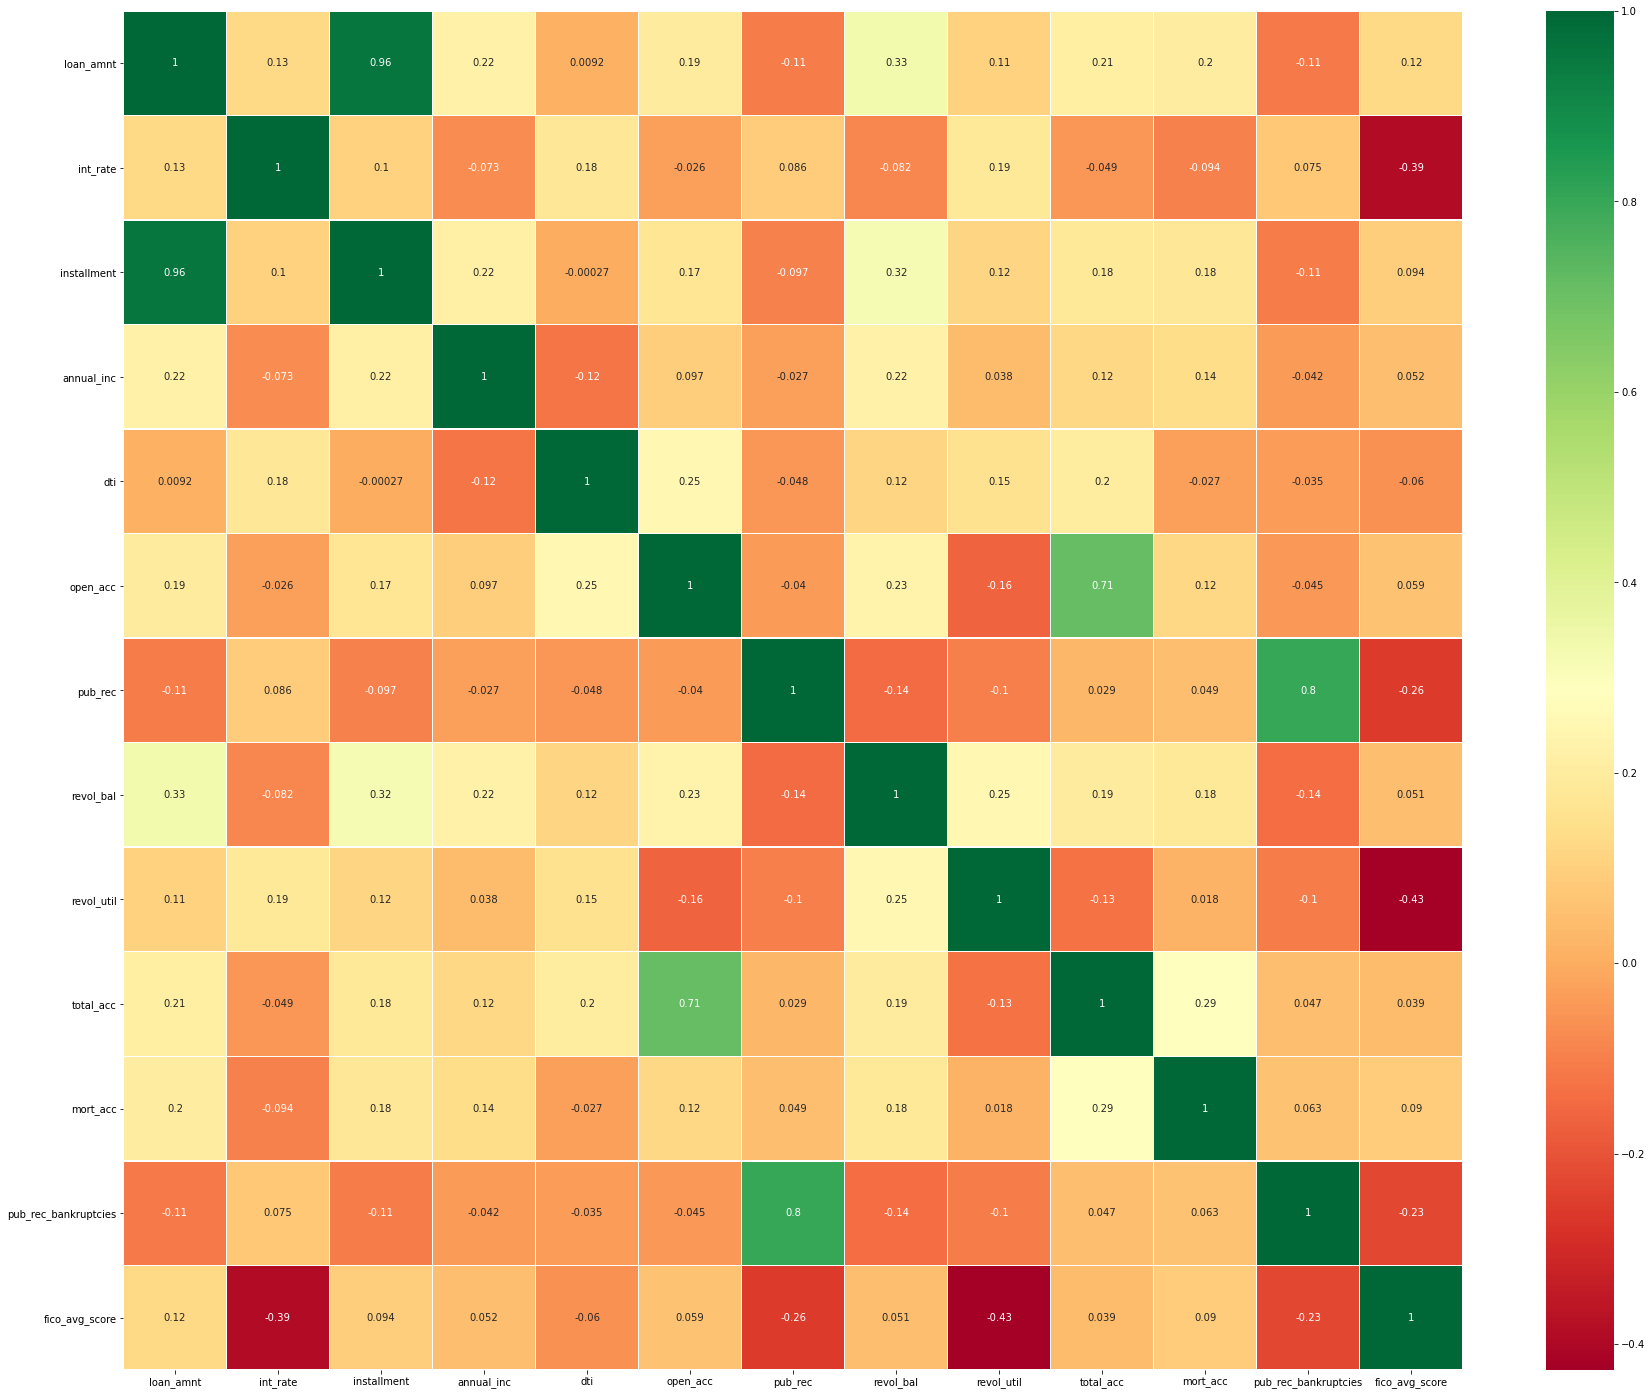

In [39]:
# plot the heatmap
cor = new_df.corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,ax=ax, annot=True,linewidths=.5,cmap="RdYlGn")

#### From this heatmap we can see that 'loan_amount' & 'installment' are Highly co related thjats why we will drop "installment" column

In [40]:
new_df.drop(['installment'],axis=1,inplace=True)

#### Here Fully-paid & Charged off ratio are same for all employ length so we are going to drop it

In [41]:
new_df.drop('emp_length', axis=1, inplace=True)

#### Converting Categorial to int

In [42]:
#Converting "term" column into integers

term_values = {' 36 months': 36, ' 60 months': 60}
new_df['term'] = new_df.term.map(term_values)

In [43]:
#converting loan_status 

new_df['loan_status'] = new_df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

#### grade is the sub feature of sub_grade

In [44]:
new_df.drop('grade', axis=1, inplace=True)

#### we will create dummy variables for 'sub_grade','home_ownership',verification_status,'application_type','purpose','initial_list_status'

In [45]:
cols = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
new_df = pd.get_dummies(new_df, columns=cols, drop_first=True)

In [46]:
#For 'zip_code' i take only first three value like for zip code '190xx' i take only 190 & this way change zip_code column

new_df['zip_code'] = new_df['zip_code'].str.split('x').str.get(0)

In [47]:
new_df['zip_code'].nunique()

854

In [48]:
#new_df['addr_state'].nunique()

In [49]:
new_df.shape

(44004, 70)

##### here is lot of different zip_code thats why i will drop it instead i will take addr_state

In [50]:
new_df.drop('zip_code',axis=1,inplace=True)

#### Creating Dummy Variables for addr_state

In [51]:
new_df = pd.get_dummies(new_df, columns=['addr_state'], drop_first=True)

#### issue_date

##### we will drop it because before loan approved we cant say issue date

In [52]:
new_df.drop('issue_d',axis=1,inplace=True)

In [53]:
# earliest_cr_line 

new_df['earliest_cr_line'] =new_df.earliest_cr_line.str.split('-', expand=True)[1]

In [54]:
new_df.earliest_cr_line.nunique()

59

In [55]:
#Changing datatype object to numerical

new_df['earliest_cr_line']=pd.to_numeric(new_df['earliest_cr_line'])

In [56]:
new_df.shape

(44004, 115)

### Train Test Split

In [57]:
w_p = new_df.loan_status.value_counts()[0] / new_df.shape[0]
w_n = new_df.loan_status.value_counts()[1] / new_df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.7948595582219798
Weight of negative values 0.20514044177802018


In [58]:
from sklearn.model_selection import train_test_split

X = new_df.drop('loan_status', axis=1)
y = new_df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print( X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30802, 114)
(13202, 114)
(30802,)
(13202,)


### Feature Importance

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.04932131 0.04111763 0.04648796 0.0485427  0.05240136 0.0481803
 0.04850287 0.01274012 0.04832305 0.04924239 0.04863912 0.01294957
 0.01032674 0.04951016 0.00230445 0.00182016 0.00245752 0.00377357
 0.00330664 0.00347994 0.00411238 0.00462365 0.00466474 0.00496126
 0.0051786  0.00508734 0.00527923 0.00485105 0.00441706 0.00446553
 0.0042267  0.00424488 0.0040109  0.00394394 0.00461857 0.00301788
 0.00233926 0.00254156 0.00150956 0.00158878 0.00153013 0.00096911
 0.0016274  0.00064907 0.00063936 0.00041791 0.00036413 0.00017696
 0.01416732 0.01133067 0.01202907 0.01504694 0.00699345 0.00131198
 0.00396549 0.00294079 0.00165944 0.00671947 0.00018507 0.00278214
 0.00177631 0.01693562 0.001752   0.00811415 0.00771811 0.00868993
 0.00384817 0.00300646 0.00592745 0.01347978 0.00446273 0.00365014
 0.00081215 0.00121788 0.01102915 0.00619027 0.00192049 0.00704381
 0.00460899 0.00257033 0.00336974 0.00381501 0.00541036 0.00553682
 0.00159232 0.00579103 0.00479991 0.00460897 0.00211881 0.00107

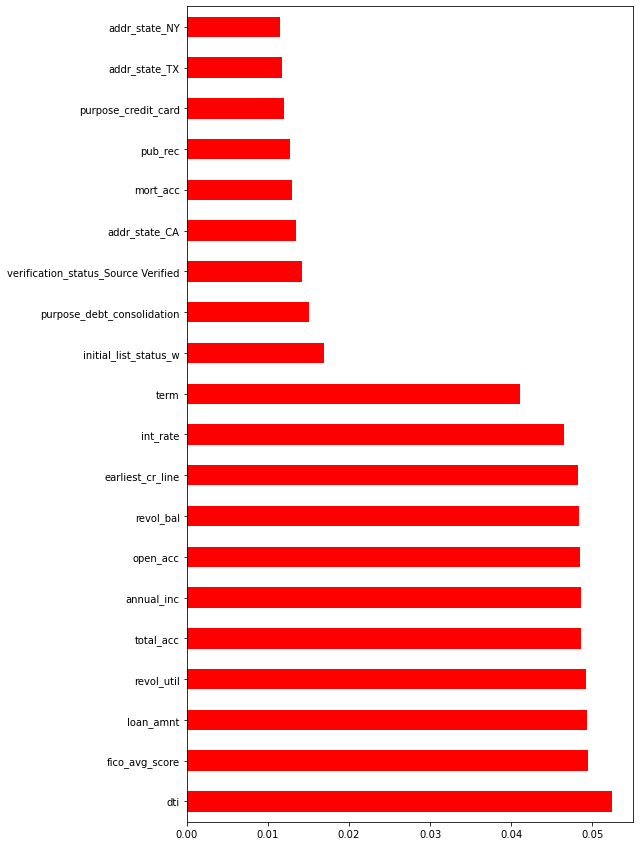

In [60]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(8,15))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='red')
plt.show()

### Normalize the data

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [63]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)

y_train_pred = log_clf.predict(X_train)
y_test_pred = log_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/home/bipul/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Result:
Accuracy Score: 80.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.813841     0.565499  0.801409      0.689670      0.762894
recall         0.972634     0.137997  0.801409      0.555315      0.801409
f1-score       0.886181     0.221855  0.801409      0.554018      0.749895
support    24483.000000  6319.000000  0.801409  30802.000000  30802.000000
_______________________________________________
Confusion Matrix: 
 [[23813   670]
 [ 5447   872]]

Test Result:
Accuracy Score: 80.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.814656     0.606452  0.804878      0.710554      0.771949
recall         0.976749     0.138848  0.804878      0.557798      0.804878
f1-score       0.888369     0.225962  0.804878      0.557165      0.752496
support   

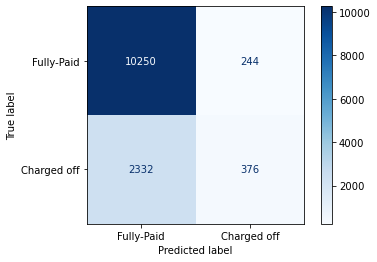

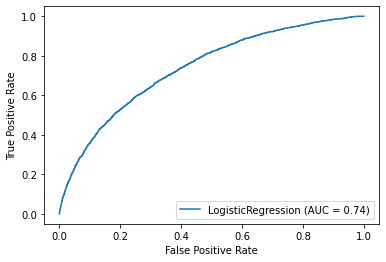

In [65]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(log_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Charged off'])

disp = plot_roc_curve(log_clf, X_test, y_test)

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
ml_models = {
    'Logistic': log_clf, 
    #'XGBoost': xgb_clf, 
    #'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC                       roc_auc_score: 0.558


## Model with over Sampling Technique

In [67]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter

In [68]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/home/bipul/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0.0: 24483, 1.0: 6319})
The number of classes after fit Counter({0.0: 23989, 1.0: 17868})


In [69]:
#LOGISTIC


from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train_ns,y_train_ns)

y_train_pred = log_clf.predict(X_train_ns)
y_test_pred = log_clf.predict(X_test)

print_score(y_train_ns, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/home/bipul/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Result:
Accuracy Score: 68.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.704838      0.652225  0.685429      0.678531      0.682378
recall         0.776147      0.563633  0.685429      0.669890      0.685429
f1-score       0.738776      0.604701  0.685429      0.671739      0.681542
support    23989.000000  17868.000000  0.685429  41857.000000  41857.000000
_______________________________________________
Confusion Matrix: 
 [[18619  5370]
 [ 7797 10071]]

Test Result:
Accuracy Score: 73.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.869131     0.389652  0.731556      0.629391      0.770780
recall         0.779684     0.545052  0.731556      0.662368      0.731556
f1-score       0.821981     0.454433  0.731556      0.638207      0.746590
suppo

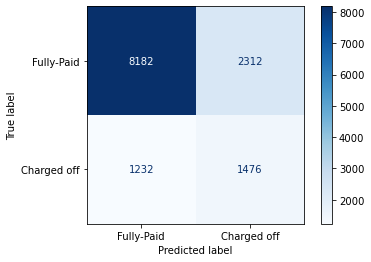

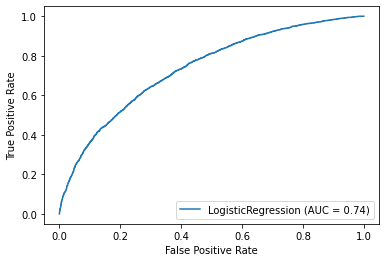

In [70]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(log_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Charged off'])

disp = plot_roc_curve(log_clf, X_test, y_test)

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
ml_models = {
    'Logistic': log_clf, 
    #'XGBoost': xgb_clf, 
    
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC                       roc_auc_score: 0.662


## Hyperparameter Tuning

In [72]:
## Logistic

from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=log_clf,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train_ns, y_train_ns)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 21.0min finished


Best Score:  0.7447325762468064
Best Params:  {'C': 1000, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


#### Mean cross-validation Roc_Auc score is 0.7447325762468064

In [73]:
y_train_pred = grid_result.predict(X_train_ns)
y_test_pred = grid_result.predict(X_test)

print_score(y_train_ns, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 68.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.705370      0.653298   0.68617      0.679334      0.683142
recall         0.776939      0.564305   0.68617      0.670622      0.686170
f1-score       0.739427      0.605549   0.68617      0.672488      0.682277
support    23989.000000  17868.000000   0.68617  41857.000000  41857.000000
_______________________________________________
Confusion Matrix: 
 [[18638  5351]
 [ 7785 10083]]

Test Result:
Accuracy Score: 73.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.870443     0.392565  0.733146      0.631504      0.772421
recall         0.780446     0.549852  0.733146      0.665149      0.733146
f1-score       0.822992     0.458083  0.733146      0.640537      0.748141
suppo

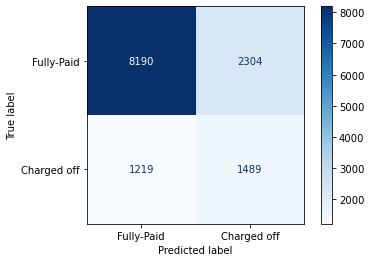

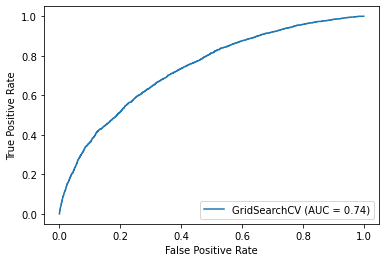

In [74]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(grid_result, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Charged off'])

disp = plot_roc_curve(grid_result, X_test, y_test)

### Roc_Auc Score For Test Data

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_probs = grid_result.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_probs)

0.7367510280193873

#### The test set Roc_Auc Score is 0.7367510280193873 which is almost similar to our model's Roc_Auc Score that is pretty good.

### I tried different model like Random Forest, SVM, K-NN. But among of them only Logistic Regression give me good result thats why here only i show Logistic Regression.

### Saving the model

In [80]:
import pickle

In [81]:
filename='Logistic_gridsearch_model.pkl'
pickle.dump(grid,open(filename,'wb'))

In [82]:
model=open('Logistic_gridsearch_model.pkl','rb')
gd=pickle.load(model)